**Nama: Muhammad Al Fikri**  
**Asal Instansi: STT Terpadu Nurul Fikri**  
**Grup SIB: M04**

*Dataset yang digunakan dari proyek ini:*  
https://www.kaggle.com/datasets/lokkagle/movie-genre-data




In [15]:
# Impor library pandas dan ubah dataset menjadi dataframe
import pandas as pd
df = pd.read_csv('kaggle_movie_train.csv')
df = df.drop(columns=['id'])
df.tail()

,text,genre
22574,n in the world to decide what I'm going to do ...,drama
22575,shards. BOJO LAZ! Laz pushes Deke back through...,drama
22576,"OTTIE You've got a thing about Ernie's, haven'...",thriller
22577,....with marked skill and dexterity . LANA wry...,action
22578,"rd walks off down the hallway, leaving his pos...",comedy


In [16]:
# Melakukan one-hot-encoding dan membuat dataframe baru serta menghapus data jika ada yg kosong
category = pd.get_dummies(df.genre)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='genre')
df_baru = df_baru.dropna(axis=0)
df_baru

,text,action,adventure,comedy,drama,horror,other,romance,sci-fi,thriller
0,"eady dead, maybe even wishing he was. INT. 2ND...",0,0,0,0,0,0,0,0,1
1,"t, summa cum laude and all. And I'm about to l...",0,0,1,0,0,0,0,0,0
2,"up Come, I have a surprise.... She takes him ...",0,0,0,1,0,0,0,0,0
3,ded by the two detectives. INT. JEFF'S APARTME...,0,0,0,0,0,0,0,0,1
4,"nd dismounts, just as the other children reach...",0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
22574,n in the world to decide what I'm going to do ...,0,0,0,1,0,0,0,0,0
22575,shards. BOJO LAZ! Laz pushes Deke back through...,0,0,0,1,0,0,0,0,0
22576,"OTTIE You've got a thing about Ernie's, haven'...",0,0,0,0,0,0,0,0,1
22577,....with marked skill and dexterity . LANA wry...,1,0,0,0,0,0,0,0,0


In [17]:
# Melakukan pre-processing data: Mengubah data menjadi lowercase dan menghapus whitespace
import string
df_baru['text'] = df_baru['text'].str.lower().str.strip()

In [18]:
# Melakukan pre-processing data: Menghapus spesial karakter
def HapusSpesialKarakter(text):
    for karakter in string.punctuation:
        text = text.replace(karakter, '')
    return text

df_baru['text'] = df_baru['text'].apply(HapusSpesialKarakter)

In [19]:
# Menampilkan dataframe baru
df_baru.head(10)

,text,action,adventure,comedy,drama,horror,other,romance,sci-fi,thriller
0,eady dead maybe even wishing he was int 2nd fl...,0,0,0,0,0,0,0,0,1
1,t summa cum laude and all and im about to laun...,0,0,1,0,0,0,0,0,0
2,up come i have a surprise she takes him by the...,0,0,0,1,0,0,0,0,0
3,ded by the two detectives int jeffs apartment ...,0,0,0,0,0,0,0,0,1
4,nd dismounts just as the other children reach ...,0,0,0,1,0,0,0,0,0
5,breadth of the bluff gabe pulls out his ancien...,0,0,0,0,0,0,0,0,1
6,uilding a man in pajamas runs out into the rai...,0,0,0,0,0,0,0,0,1
7,elles and rita hayworth just disgustingly rich...,0,0,0,1,0,0,0,0,0
8,memphis goes back into the garage budgy cackle...,0,0,0,0,0,0,0,0,1
9,e reels as the world spins sweat pours off him...,1,0,0,0,0,0,0,0,0


In [20]:
# Melakukan pelabelan data
text = df_baru['text'].values
genre = df_baru[['action', 'adventure', 'comedy', 'drama','horror','other','romance','sci-fi','thriller']].values

In [21]:
# Melakukan splitting data
from sklearn.model_selection import train_test_split
text_latih, text_test, genre_latih, genre_test = train_test_split(text, genre, test_size=0.2)

In [22]:
# Melakukan tokenisasi dan mengonversi sampel menjadi sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=10000, oov_token='x')
tokenizer.fit_on_texts(text_latih) 
tokenizer.fit_on_texts(text_test)
 
sekuens_latih = tokenizer.texts_to_sequences(text_latih)
sekuens_test = tokenizer.texts_to_sequences(text_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [31]:
# Membuat model
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')
])

# Menambahkan optimizer
model.compile(optimizer = 'Adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [32]:
# Menambahkan fitur callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.86 and logs.get('val_accuracy')>0.86):
      print("\nAkurasi train dan validasi telah mencapai target = 86%!")
      self.model.stop_training = True
callbacks = myCallback()

In [33]:
# Melakukan proses training model
num_epochs = 50
history = model.fit(padded_latih, 
                    genre_latih, 
                    epochs=num_epochs, 
                    validation_data=(padded_test, genre_test), 
                    verbose=2,
                    callbacks=[callbacks])

Epoch 1/50
565/565 - 8s - loss: 1.5645 - accuracy: 0.3780 - val_loss: 1.4172 - val_accuracy: 0.3992 - 8s/epoch - 15ms/step
Epoch 2/50
565/565 - 6s - loss: 1.2345 - accuracy: 0.4446 - val_loss: 1.1360 - val_accuracy: 0.4741 - 6s/epoch - 10ms/step
Epoch 3/50
565/565 - 6s - loss: 1.0448 - accuracy: 0.4899 - val_loss: 1.0925 - val_accuracy: 0.4911 - 6s/epoch - 10ms/step
Epoch 4/50
565/565 - 6s - loss: 0.9589 - accuracy: 0.5036 - val_loss: 1.0918 - val_accuracy: 0.4858 - 6s/epoch - 10ms/step
Epoch 5/50
565/565 - 6s - loss: 0.8763 - accuracy: 0.5412 - val_loss: 1.1167 - val_accuracy: 0.5080 - 6s/epoch - 10ms/step
Epoch 6/50
565/565 - 6s - loss: 0.8125 - accuracy: 0.5934 - val_loss: 0.9809 - val_accuracy: 0.6176 - 6s/epoch - 10ms/step
Epoch 7/50
565/565 - 6s - loss: 0.6034 - accuracy: 0.7306 - val_loss: 0.8052 - val_accuracy: 0.7132 - 6s/epoch - 10ms/step
Epoch 8/50
565/565 - 6s - loss: 0.4760 - accuracy: 0.7902 - val_loss: 0.7780 - val_accuracy: 0.7254 - 6s/epoch - 10ms/step
Epoch 9/50
565/5

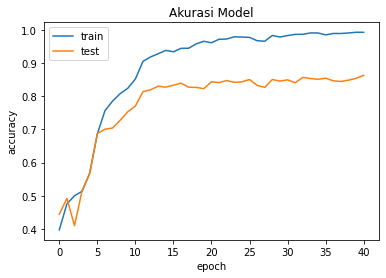

In [26]:
#Menampilkan plotting Accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

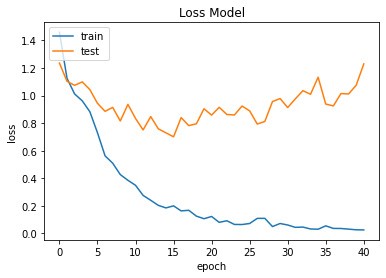

In [27]:
#Menampilkan plotting Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()